In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

## New

### 1. rollout/return

In [62]:
# INSTRUCTION:
# change itv to generate results for 0.125, 0.25 ...
#-----------

import glob
interval = ["point125","point25","point5","point75","one"]
itv = interval[0]
csv_dir = "../SHARCNET/Results/Tensorboard_to_CSV/multi/ddpg/300_300_NN/"+itv+"/"
plot_save_dir = './plots_for_thesis/multi/ddpg/300_300_NN/'
modes = ["SARA","PLA","Random"]
all_data_files = dict()
for mode in modes:
    mode_data_files = glob.glob(csv_dir+"run_"+ mode +"*.csv")
    mode_data_files.sort()
    print("{}: {} files found".format(mode,len(mode_data_files)))
    for f in mode_data_files:
        print(f)
    all_data_files[mode]=mode_data_files

SARA: 1 files found
../SHARCNET/Results/Tensorboard_to_CSV/multi/ddpg/300_300_NN/point125\run_SARA_1569907813gra646_file.csv
PLA: 2 files found
../SHARCNET/Results/Tensorboard_to_CSV/multi/ddpg/300_300_NN/point125\run_PLA_1569907811gra642_file.csv
../SHARCNET/Results/Tensorboard_to_CSV/multi/ddpg/300_300_NN/point125\run_PLA_1569907811gra643_file.csv
Random: 1 files found
../SHARCNET/Results/Tensorboard_to_CSV/multi/ddpg/300_300_NN/point125\run_Random_1569907809gra644_file.csv


In [63]:
all_combined_data = dict()

for mode in modes:

    mode_data = []
    for file in all_data_files[mode]:
        mode_data.append(pd.read_csv(file))
        
    # Random has no Q_mean records
    if mode == "Random":
        metrics = ["rollout/return"]
    else:
        metrics = ["rollout/return", "rollout/Q_mean"]
    
    mode_combined_data = pd.DataFrame()
    for metric in metrics:
        metric_combined_data = pd.DataFrame()
        for i in range(len(all_data_files[mode])):
            metric_combined_data[metric+"_run"+str(i)] = mode_data[i][metric]
        metric_combined_data[metric+"_avg"] = metric_combined_data.mean(axis=1)
        metric_combined_data[metric+'_std'] = metric_combined_data.std(axis=1)
        
        mode_combined_data = pd.concat([mode_combined_data,metric_combined_data],axis=1)
    all_combined_data[mode] = mode_combined_data

In [64]:
all_combined_data['SARA']

,rollout/return_run0,rollout/return_avg,rollout/return_std,rollout/Q_mean_run0,rollout/Q_mean_avg,rollout/Q_mean_std
0,12.535118,12.535118,0.0,0.012586,0.012586,0.0
1,14.277998,14.277998,0.0,0.281027,0.281027,0.0
2,16.108330,16.108330,0.0,0.391938,0.391938,0.0
3,16.719240,16.719240,0.0,0.455942,0.455942,0.0
4,6.340077,6.340077,0.0,0.484211,0.484211,0.0
5,4.047483,4.047483,0.0,0.483048,0.483048,0.0
6,8.969653,8.969653,0.0,0.473711,0.473711,0.0
7,7.271651,7.271651,0.0,0.513289,0.513289,0.0
8,16.716339,16.716339,0.0,0.585019,0.585019,0.0
9,13.254435,13.254435,0.0,0.633793,0.633793,0.0


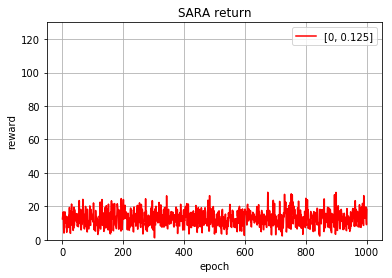

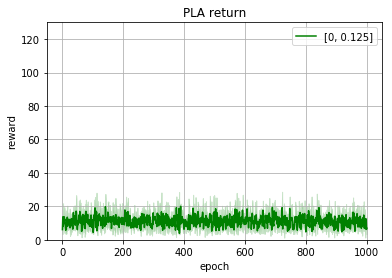

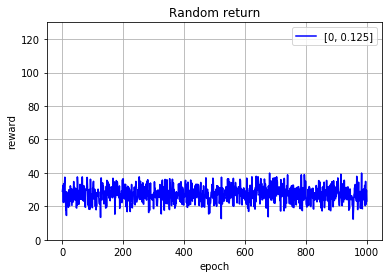

In [65]:
# Plot return
colors = ['r','g','b']
metric = "rollout/return"
me = metric.split('/')[1]
modes = ["SARA","PLA","Random"]
for mode, c in zip(modes, colors):
    plt.figure()
    plt.grid()
    data = all_combined_data[mode]
    length = data.shape[0]
    label = "[0, "+itv.replace("point","0.")+"]"
    plt.fill_between(np.linspace(1,length,length), data[metric+"_avg"] - data[metric+"_std"],
                 data[metric+'_avg'] + data[metric+'_std'], alpha=0.2,
                 color=c)
    plt.plot(np.linspace(1,length,length), data[metric+'_avg'], '-', color=c,
         label=label)
    plt.legend(loc="best")
    plt.ylim([0,130])
    plt.title('{} {}'.format(mode,me))
    plt.xlabel("epoch")
    plt.ylabel("reward")
    plt.savefig(plot_save_dir+'{}_{}_{}.png'.format(itv,mode,me), bbox_inches='tight')


### 2.rollout/Q_mean

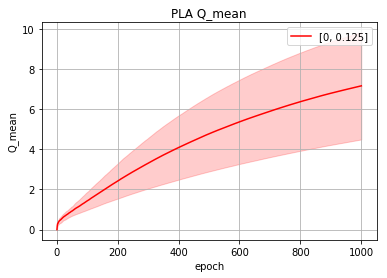

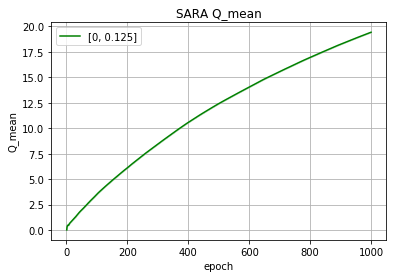

In [66]:
colors = ['r','g','b']
metric = "rollout/Q_mean"
modes = ["PLA","SARA"]
me = metric.split('/')[1]
for mode, c in zip(modes, colors):
    plt.figure()
    plt.grid()
    data = all_combined_data[mode]
    length = data.shape[0]
    label = "[0, "+itv.replace("point","0.")+"]"
    plt.fill_between(np.linspace(1,1000,length), data[metric+"_avg"] - data[metric+"_std"],
                 data[metric+'_avg'] + data[metric+'_std'], alpha=0.2,
                 color=c)
    plt.plot(np.linspace(1,1000,length), data[metric+'_avg'], '-', color=c,
         label=label)
    plt.legend(loc="best")
#     plt.ylim([0,27])
    plt.title('{} {}'.format(mode,me))
    plt.xlabel("epoch")
    plt.ylabel("Q_mean")
    plt.savefig(plot_save_dir+'{}_{}_{}.png'.format(itv,mode,me), bbox_inches='tight')
    

---------------------